In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target  # Features and target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [6]:
batch_sizes = [16, 32, 64]
history_records = {}

In [7]:
for batch_size in batch_sizes:
    print(f"\nTraining with batch size = {batch_size}\n")
    model = create_model()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=batch_size,
        verbose=1
    )
    history_records[batch_size] = history.history  


Training with batch size = 16



C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1.3836 - val_loss: 0.4495
Epoch 2/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4123 - val_loss: 0.3991
Epoch 3/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3848 - val_loss: 0.4024
Epoch 4/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3704 - val_loss: 0.3766
Epoch 5/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3686 - val_loss: 0.3657
Epoch 6/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3514 - val_loss: 0.3834
Epoch 7/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3575 - val_loss: 0.3503
Epoch 8/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3326 - val_loss: 0.3478
Epoch 9/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3328 - val_loss: 0.3444
Epoch 10/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3261 - val_loss: 0.3544
Epoch 11/20
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3425 - val_loss: 0.3363
Epoch 12/20
1032/1032 ━━━━━━━━

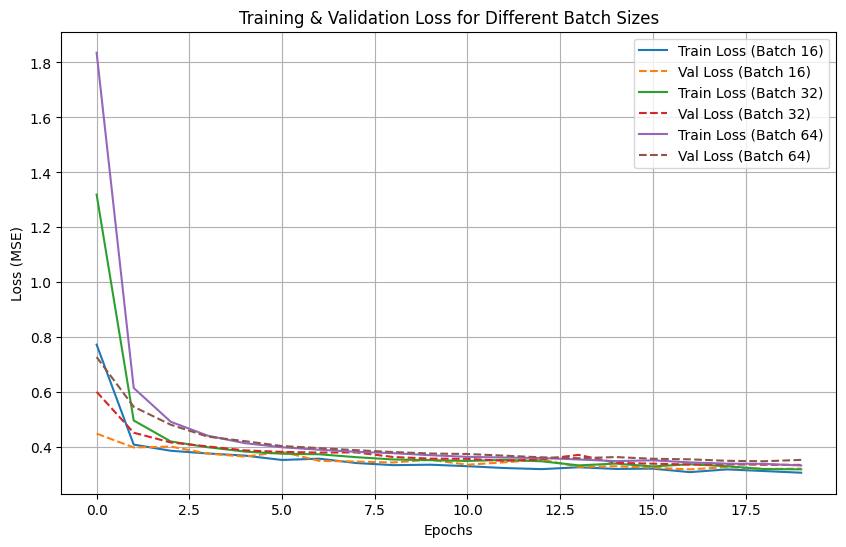

In [8]:
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(history_records[batch_size]['loss'], label=f"Train Loss (Batch {batch_size})")
    plt.plot(history_records[batch_size]['val_loss'], '--', label=f"Val Loss (Batch {batch_size})")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()